In [191]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [192]:
# Definiendo constantes
G = 6.674e-11 # Constante Gravitacional
a = 7.56e-15 # Constante de radiación de cuerpo negro en [J m^{−3}K^{-4}]
Msol = 1.989e30 # Masa solar en kilogramos
m_H = 1.6737e-27 # Masa de hidrógeno en kilogramos
k_B = 1.380649e-23 # Constante de Boltzmann


In [193]:
# Definir la relación entre 1-beta* y mu
def ecuacion_cuartica(beta_star, M, mu_c):
    M_Msol=M/Msol
    B = np.pi * a * G**3 * Msol**2 * m_H**4 / (18 * k_B**4)
    return beta_star**4 + M_Msol**2 * B * mu_c**4 * beta_star**4 - 1 + beta_star



In [194]:
# Definir valores de M_star/M_sun
M_values = np.linspace(0, 50, 100)*Msol
#beta_star = np.linspace(0,1,100)
# Definir valores de mu
mu_values = np.linspace(0.5, 2, 10)
solutions_all = []
for mu in mu_values:
    solutions = []
    for M in M_values:
        # Solve the equation for the current M and mu
        beta_star_solution = fsolve(ecuacion_cuartica, 0.5, args=(M, mu))
        # Calculate and print the corresponding solution for (1 - beta*)
       #print("For M =", M, "and mu =", mu, ", solution for (1 - beta*):", 1 - beta_star_solution)
        solutions.append( 1- beta_star_solution[0])
    solutions_all.append(solutions)
np.size(solutions_all)

1000

In [195]:
#Para 0.62
mu_sol=0.62
beta_sol=[]
for M in M_values:
    beta_s=fsolve(ecuacion_cuartica,0.5,args=(M,mu_sol))
    beta_sol.append(1 - beta_s[0])

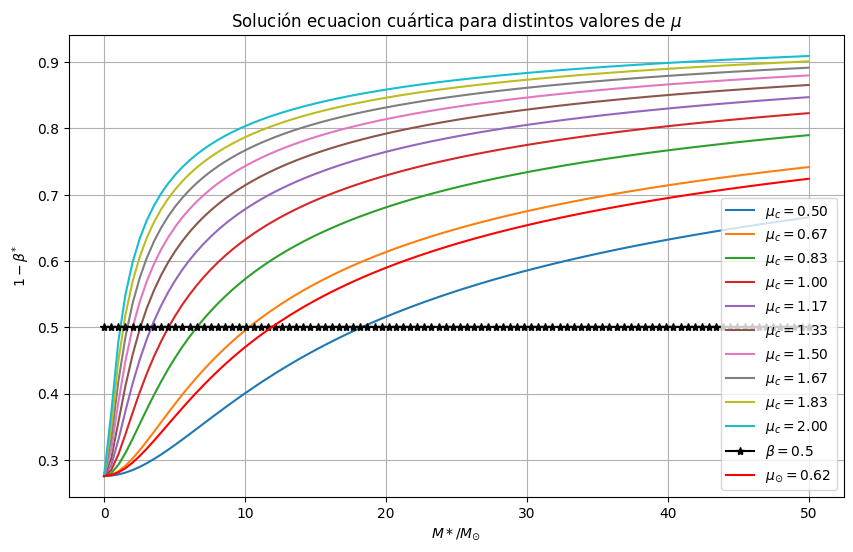

In [201]:
#Gráfica
plt.figure(figsize=(10, 6))
for i, mu in enumerate(mu_values):
    plt.plot(M_values/Msol, solutions_all[i], label= f'$\mu_c ={mu:.2f}$')
plt.plot(M_values/Msol,np.ones(100)*0.5,'-*', c='black',label= r'$\beta=0.5$')
plt.plot(M_values/Msol,beta_sol,c='red',label = r'$\mu_{\odot}=0.62$' )
plt.xlabel(r'$M*/M_{\odot}$')
plt.ylabel(r'$1 - \beta^{*}$')
plt.title(r'Solución ecuacion cuártica para distintos valores de $\mu$')
plt.legend()
plt.grid(True)
plt.show()